In [27]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RANDOM_STATE = 42

In [4]:
#importando a base
DADOS = '..\dados\Mall_customers_sem_CustumerID.csv'
df_analise = pd.read_csv(DADOS)

In [7]:
#Visualizando a base
df_analise.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


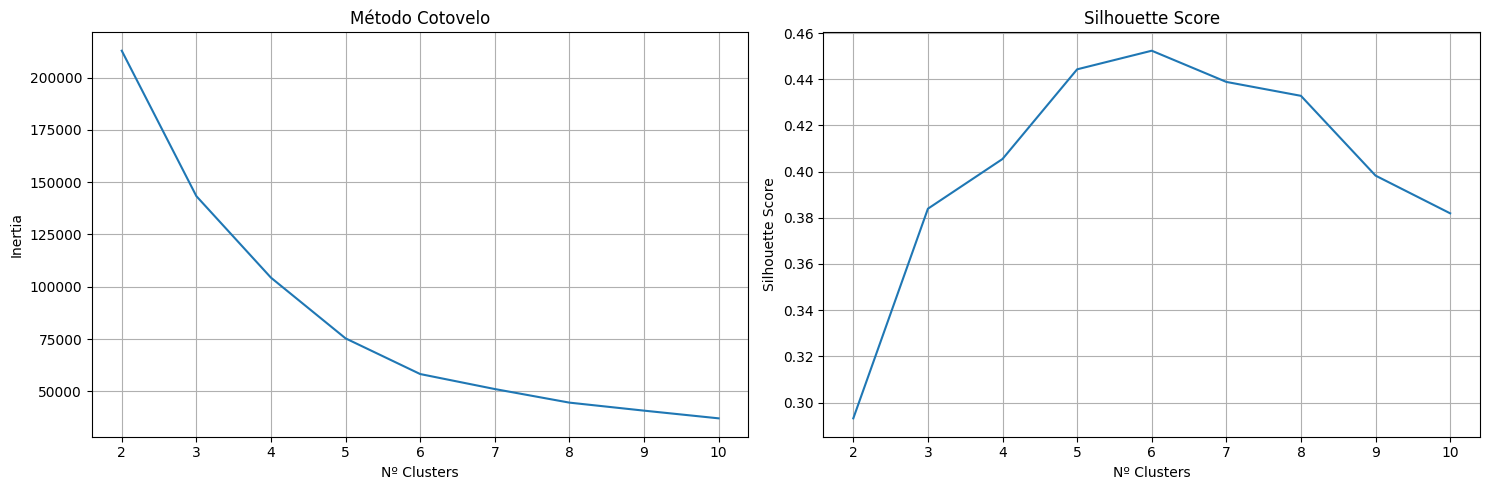

In [46]:
#Criando a análise de cotovelo(elbow) e silhouette_score 

fig , axs = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout =True)

elbow = {}
silhouet = []
k_range = range(2,11)
X =df_analise.drop('Gender',axis=1)
for i in k_range:
    knn = KMeans(n_clusters=i,random_state=RANDOM_STATE)
    knn.fit(X)
    elbow[i] = knn.inertia_
    
    labels = knn.labels_
    silhouet.append(silhouette_score(X,labels))
    
sns.lineplot(x=list(elbow.keys()),y=elbow.values(), ax = axs[0])
sns.lineplot(x=list(k_range),y=silhouet, ax = axs[1])

axs[0].set_ylabel('Inertia')
axs[0].set_xlabel('Nº Clusters')
axs[0].set_title('Método Cotovelo')


axs[1].set_ylabel('Silhouette Score')
axs[1].set_xlabel('Nº Clusters')
axs[1].set_title('Silhouette Score')

axs[0].grid()
axs[1].grid()
plt.show()

In [47]:
#Treinando o modelo 
kmeans =  KMeans(n_clusters=6,random_state=RANDOM_STATE)
kmeans.fit(X)


array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [48]:
#importando o modelo
import joblib
joblib.dump(kmeans,'../modelos/kmeans.pkl')

['../modelos/kmeans.pkl']

In [49]:
df_clustered = df_analise.copy()
df_clustered['Cluster'] = kmeans.labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [50]:
#Exportando a base
df_clustered.to_csv('..\dados\Mall_customers_sem_CustumerID_Clustered.csv',index=False)

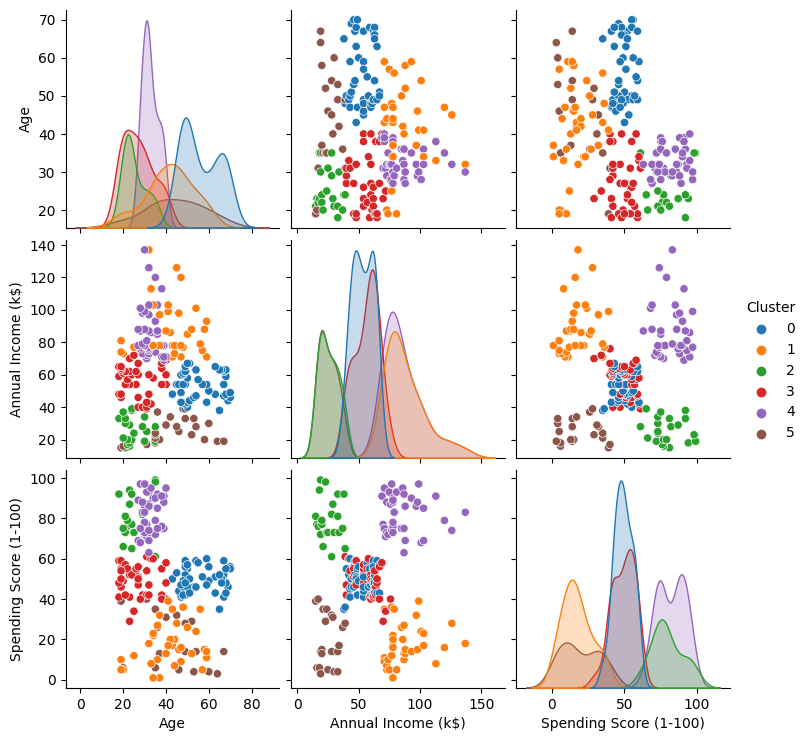

In [54]:
sns.pairplot(df_clustered,hue='Cluster',palette="tab10");

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


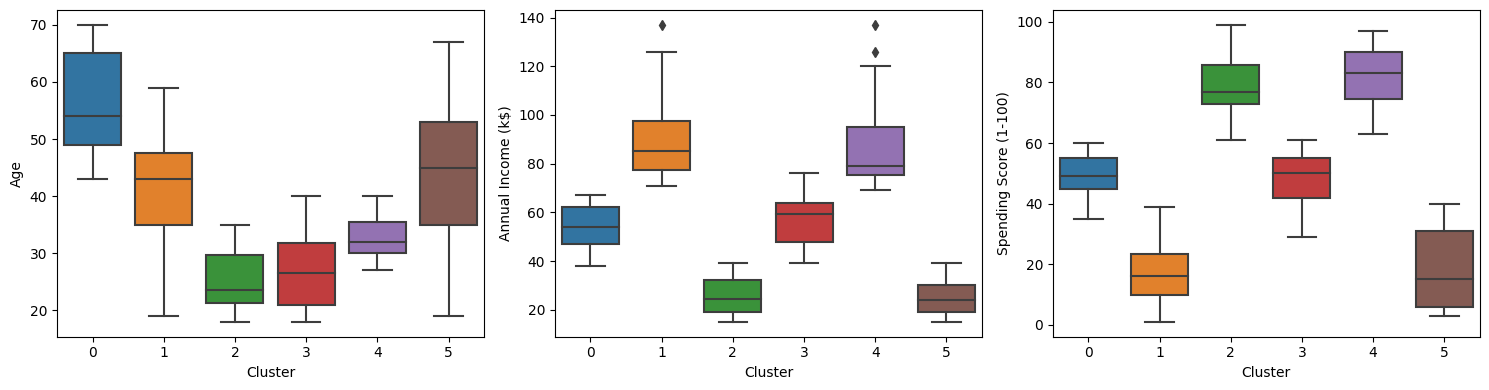

In [64]:

fif , axs = plt.subplots(nrows=1 , ncols=3,figsize =(15,4),tight_layout =True)
    
for ax , col in zip(axs,X):
    sns.boxplot(data = df_clustered , x ="Cluster" , y =col ,ax = ax )

In [67]:
df_clustered.Cluster.value_counts(normalize=True).mul(100).sort_index()

Cluster
0    22.5
1    17.5
2    11.0
3    19.0
4    19.5
5    10.5
Name: proportion, dtype: float64

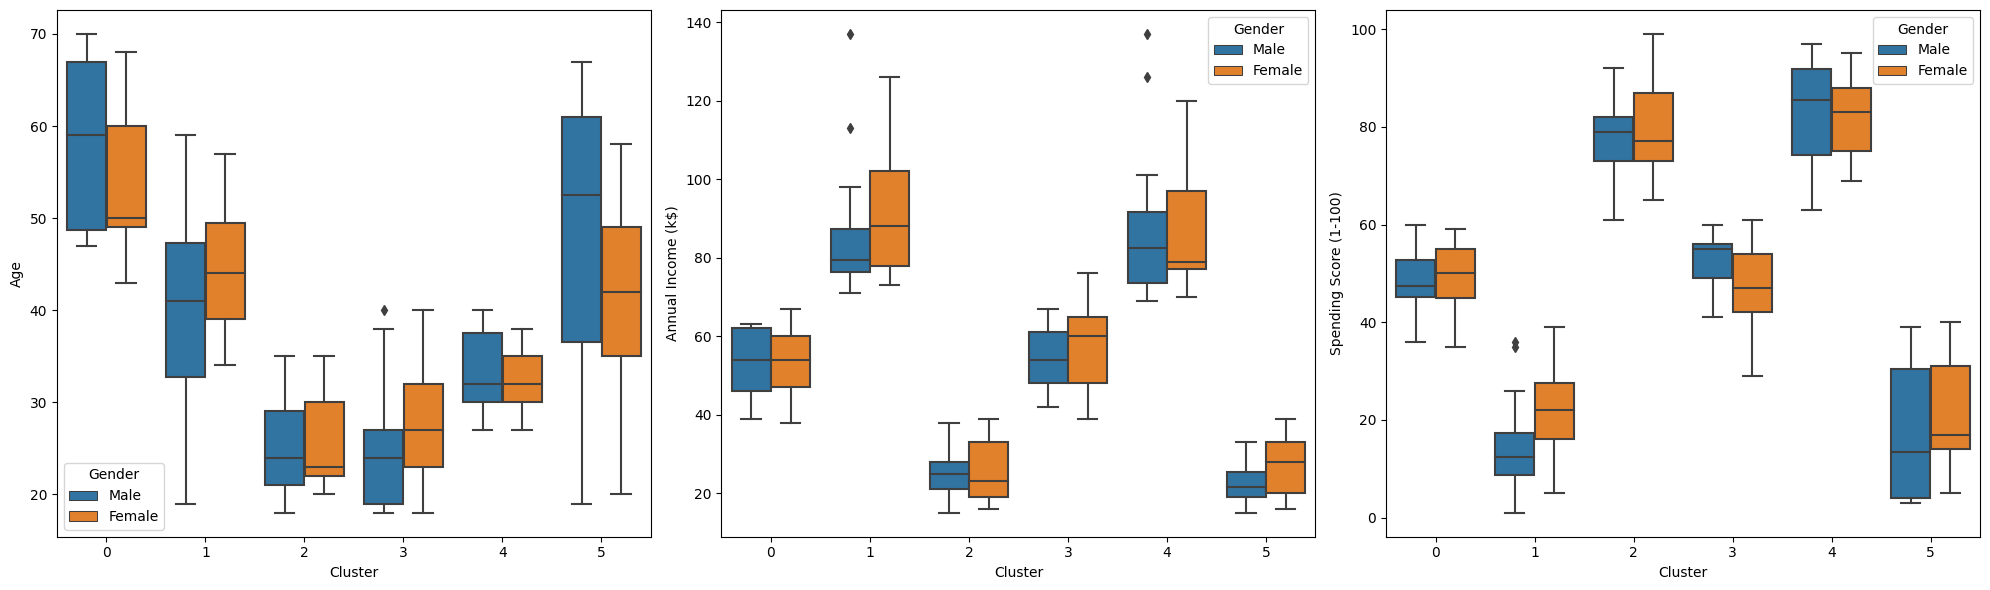

In [70]:

fif , axs = plt.subplots(nrows=1 , ncols=3,figsize =(20,6),tight_layout =True)
    
for ax , col in zip(axs,X):
    sns.boxplot(data = df_clustered , x ="Cluster" , y =col ,ax = ax,hue='Gender' )

In [72]:
df_clustered[['Cluster','Gender']].value_counts().sort_index()

Cluster  Gender
0        Female    25
         Male      20
1        Female    15
         Male      20
2        Female    13
         Male       9
3        Female    25
         Male      13
4        Female    21
         Male      18
5        Female    13
         Male       8
Name: count, dtype: int64